# Co-occurrence
It counts up the actual number of observed co-occurrences of fates in clones.
But not normalized by fate cluster size

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import sclitr as sl
import math
import numpy as np
import pandas as pd
import seaborn as sns
import time
from scipy.cluster.hierarchy import dendrogram, linkage

/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/felix/miniconda3/envs/new_sclitr/lib/python3.11/site-packages/anndata/utils.py:429: 

In [2]:
# Set font globally
plt.rcParams.update({
    'font.family': 'serif',           # Font family
    'font.serif': ['Arial'], # Specific font
})

In [ ]:
DATA_PATH = "/placodes/data"

In [ ]:
adata_conc = sc.read_h5ad(f"{DATA_PATH}/anndatas/cranial_placodal_reannotated.h5ad")

In [6]:
# Rename epibranchial derived neurons
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Epibranchial-derived neurons', 'new_annotation'] = 'Epibranchial neurons'

In [10]:
# Combine CNS to only Forebrain, Midbrain, and Hindbrain  
# Forebrain
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Forebrain, TelA', 'new_annotation'] = 'Forebrain'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Forebrain, peduncular hypothalmus', 'new_annotation'] = 'Forebrain'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Forebrain, terminal hypothalmus', 'new_annotation'] = 'Forebrain'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Forebrain, terminal hypothalmus', 'new_annotation'] = 'Forebrain'

# Hindbrain
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Medullary hindbrain', 'new_annotation'] = 'Hindbrain'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Hindbrain floor', 'new_annotation'] = 'Hindbrain'

# Midbrain
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Diencephalon', 'new_annotation'] = 'Midbrain'

# Midbrain
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Diencephalon', 'new_annotation'] = 'Midbrain'

In [11]:
# Rename olfactory 
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Vomeronasal epithelium', 'new_annotation'] = 'Olfactory epithelium'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Pioneer olfactory neruons', 'new_annotation'] = 'Olfactory neurons'


In [ ]:
# Combine skin
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Primary palate epithelium', 'new_annotation'] = 'Epidermis'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Frontnasal process epithelium', 'new_annotation'] = 'Epidermis'

In [13]:
# Combine otic 
adata_conc.obs['new_annotation'] = adata_conc.obs['new_annotation'].cat.add_categories('Otic')

adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Vestibular ganglia neurons', 'new_annotation'] = 'Otic'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Vestibular and spiral ganglia neurons', 'new_annotation'] = 'Otic'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Otic vesicle epithlium', 'new_annotation'] = 'Otic'


In [14]:
# Combine epibranchial
adata_conc.obs['new_annotation'] = adata_conc.obs['new_annotation'].cat.add_categories('Epibranchial')

adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Epibranchial neurons', 'new_annotation'] = 'Epibranchial'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Epibranchial epithelium', 'new_annotation'] = 'Epibranchial'


In [15]:
# Combine Olfactory
adata_conc.obs['new_annotation'] = adata_conc.obs['new_annotation'].cat.add_categories('Olfactory')

adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Olfactory neurons', 'new_annotation'] = 'Olfactory'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Olfactory epithelium', 'new_annotation'] = 'Olfactory'


In [16]:
# Combine eye
adata_conc.obs['new_annotation'] = adata_conc.obs['new_annotation'].cat.add_categories('Eye (Retina + RPE)')

adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Optic cup neuroectoderm', 'new_annotation'] = 'Eye (Retina + RPE)'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Retinal mitotic progenitors', 'new_annotation'] = 'Eye (Retina + RPE)'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Retina pigmented epithelium', 'new_annotation'] = 'Eye (Retina + RPE)'
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Retina', 'new_annotation'] = 'Eye (Retina + RPE)'



In [19]:
# Keep mesenchyme but rename Unknown mesenchyme to just mesenchyme
adata_conc.obs.loc[adata_conc.obs['new_annotation'] == 'Unknown mesenchyme', 'new_annotation'] = 'Mesenchyme'

**Figure out what to do with Glial cells**


In [20]:
# Figure out what to do with Glial cells
glial_cells= adata_conc[adata_conc.obs["new_annotation"] == "Glial cells"]


In [21]:
id_= 0
for name in glial_cells.obs_names:
    adata_conc.obs[f"Glial Cells {id_}"] = adata_conc.obs_names==name
    id_+=1

In [22]:
glial_cells = ["SCP",
               "Boundary cap",
               "Satellite Glia",
               "NC-deried eye melanocyte"
              ]

In [23]:
adata_conc.obs["SCPs"] = adata_conc.obs["new_annotation"] == "SCP"
adata_conc.obs["Boundary caps"] = adata_conc.obs["new_annotation"] == "Boundary cap"
adata_conc.obs["Satellite Glias"] = adata_conc.obs["new_annotation"] == "Satellite Glia"
adata_conc.obs["NC-derived eye melanocytes"] = adata_conc.obs["new_annotation"] == "NC-derived eye melanocyte"
adata_conc.obs["Sensory neural progenitors"] = adata_conc.obs["new_annotation"] == "Sensory neural progenitors"


In [24]:
adata_conc.obs['SCPs'] = adata_conc.obs['SCPs'].replace(False, np.nan)
adata_conc.obs['Boundary caps'] = adata_conc.obs['Boundary caps'].replace(False, np.nan)
adata_conc.obs['Satellite Glias'] = adata_conc.obs['Satellite Glias'].replace(False, np.nan)
adata_conc.obs['NC-derived eye melanocytes'] = adata_conc.obs['NC-derived eye melanocytes'].replace(False, np.nan)
adata_conc.obs['Sensory neural progenitors'] = adata_conc.obs['Sensory neural progenitors'].replace(False, np.nan)


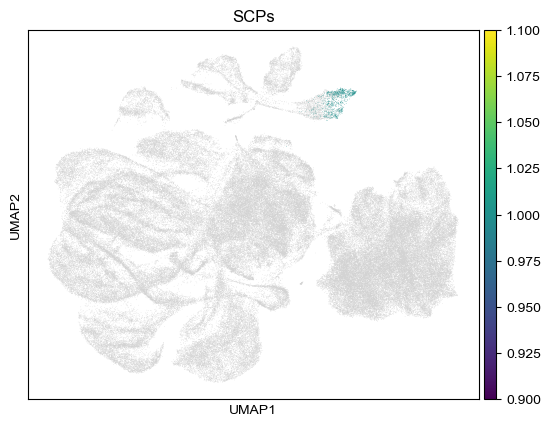

In [25]:
sc.pl.umap(adata_conc,
           color=["SCPs"],
           na_color="lightgrey"
          )

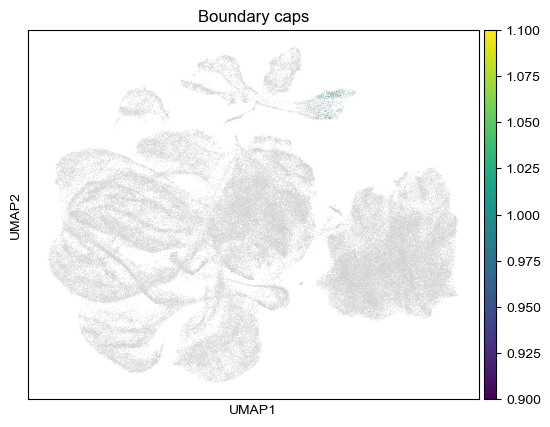

In [26]:
sc.pl.umap(adata_conc,
           color=[ "Boundary caps"],
           na_color="lightgrey"
          )

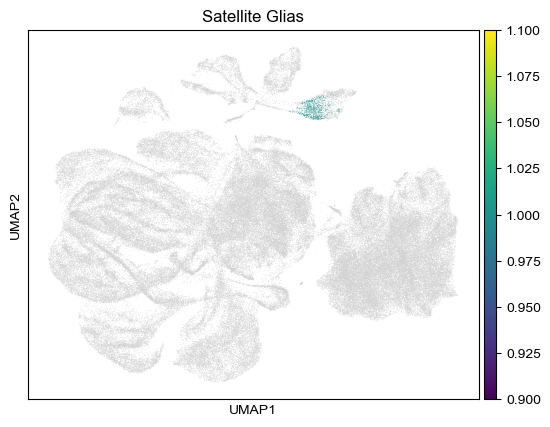

In [27]:
sc.pl.umap(adata_conc,
           color=["Satellite Glias"],
           na_color="lightgrey"
          )

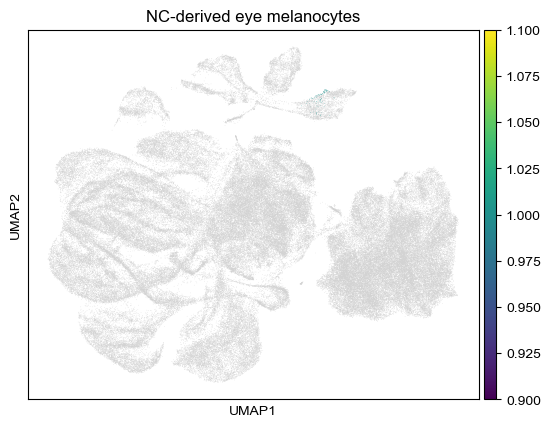

In [28]:
sc.pl.umap(adata_conc,
           color=["NC-derived eye melanocytes"],
           na_color="lightgrey"
          )

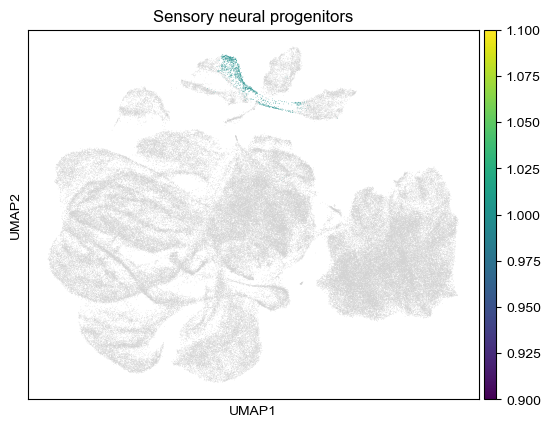

In [29]:
sc.pl.umap(adata_conc,
           color=["Sensory neural progenitors"],
           na_color="lightgrey"
          )

In [30]:
id_ = 5
size_mapping = adata_conc.obs[f"Glial Cells {id_}"].map({True: 50, False: 1})
adata_conc.obs[f"Glial Cells {id_}"] = adata_conc.obs[f"Glial Cells {id_}"].replace(False, np.nan)

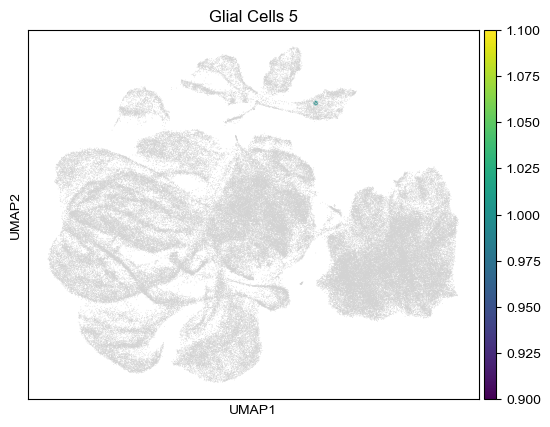

In [31]:
import numpy as np
# Create a size array where True values get larger dots
sizes = np.where(adata_conc.obs[f"Glial Cells {id_}"], 20, 1)  # 50 for True, 20 for False
sc.pl.umap(adata_conc,
           color=[f"Glial Cells {id_}"],
           size=size_mapping,
           na_color="lightgrey"
          )

In [32]:
adata_conc[adata_conc.obs[f"Glial Cells {id_}"] == True].obs_names.tolist()[0]

'112623_E11_cranial2:TTAGTCTAGGCCCACT'

In [33]:
fix_glia_dict = {"112623_E11_Otic:TCCTGCAGTGGACCTC":"SCP",
                 "lens3:AACCTGAAGGGACCAT":"Sensory neural progenitors",
                 'otic1:ATGATCGAGGGCGAGA':"SCP",
                 'otic2:CTACTATCAATAACGA':"SCP",
                 '112623_E11_cranial1:GCGGAAAGTCGATTAC':"Boundary cap",
                 '112623_E11_cranial2:TTAGTCTAGGCCCACT':"Satellite Glia",
}

In [34]:
for key_ in fix_glia_dict:
    adata_conc.obs.loc[adata_conc.obs_names == key_, 'new_annotation'] = fix_glia_dict[key_]
    


In [35]:
adata_conc = adata_conc[adata_conc.obs.new_annotation != "Glial cells"] 


### Co-occurance unique

In [36]:
annotations = list(set(adata_conc.obs.new_annotation))

In [37]:
annotations

['NC-derived eye melanocyte',
 'Sensory neural progenitors',
 'Lens',
 'Forebrain',
 'Midbrain',
 'Boundary cap',
 'Epidermis',
 'Epibranchial',
 'Otic',
 'Immune cells',
 'Satellite Glia',
 'CNS Inmature neurons',
 'Olfactory',
 'Adenohypophyseal cells',
 'SCP',
 'Hindbrain',
 'Eye (Retina + RPE)',
 'Mesenchyme',
 'Trigeminal ganglia neurons']

In [38]:
""" 
Do it for number OF CLONES not number of cells. 
So the only differene is that I use unique here instead of ALL clone ids.
Also adding the compared annotations cells when counting is also removed since we just look at unique ones now. 
"""
look_up_dict = {}
co_occurrence_dict = {}
for annot in annotations:
    clone_ids = list(adata_conc[adata_conc.obs.new_annotation == annot].obs.clone_id.unique()) 
    clone_ids = [x for x in clone_ids if x != "NA"]
    tmp_dict = {}
    for comp_annot in annotations:
        if comp_annot in look_up_dict:
            clone_ids_comp = look_up_dict[comp_annot]
        else:
            clone_ids_comp = list(adata_conc[adata_conc.obs.new_annotation == comp_annot].obs.clone_id.unique())
            clone_ids_comp = [x for x in clone_ids_comp if x != "NA"]
            look_up_dict[comp_annot] = clone_ids_comp
            
        co_occurrence_count = int(sum([1 for x in clone_ids if x in clone_ids_comp]))
        
        tmp_dict[comp_annot] = co_occurrence_count
    co_occurrence_dict[annot] = tmp_dict
    
co_occurrence = pd.DataFrame(co_occurrence_dict)

In [39]:
co_occurrence.columns.tolist()

['NC-derived eye melanocyte',
 'Sensory neural progenitors',
 'Lens',
 'Forebrain',
 'Midbrain',
 'Boundary cap',
 'Epidermis',
 'Epibranchial',
 'Otic',
 'Immune cells',
 'Satellite Glia',
 'CNS Inmature neurons',
 'Olfactory',
 'Adenohypophyseal cells',
 'SCP',
 'Hindbrain',
 'Eye (Retina + RPE)',
 'Mesenchyme',
 'Trigeminal ganglia neurons']

In [40]:
adata_conc[adata_conc.obs.clone_id != "NA"]

View of AnnData object with n_obs × n_vars = 63841 × 5000
    obs: 'batch', 'sample_id', 'location', 'devtime', 'plasmids', 'injection', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'combined_E7.5:clones', 'combined_E8.5:clones', 'clone_id', 'leiden_0.5', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'clones_clusters_0.5', 'clones_clusters_1', 'clones_clusters_2.5', 'clones_clusters_2', 'clones_clusters_3', 'clones_clusters_4', 'annotation', 'broad_annotation', 'new_annotation', 'Glial Cells 0', 'Glial Cells 1', 'Glial Cells 2', 'Glial Cells 3', 'Glial Cells 4', 'Glial Cells 5', 'SCPs', 'Boundary caps', 'Satellite Glias', 'NC-derived eye melanocytes', 'Sensory neural progenitors'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'bag-of-clones_names', 'batch_colors', 'clones_clusters_1_colors', 'harmony', 'hvg', 'leiden_0.5', 'leiden_1', 'leiden_2', 'leiden_3', 'le

In [41]:
# Reorder according to the order I want
specified_order=[
    "Epidermis",
    
    "Olfactory",
    "Otic",
    "Epibranchial",
    "Trigeminal ganglia neurons",
    "Adenohypophyseal cells",
    "Lens",
    
    "Eye (Retina + RPE)",
    "NC-derived eye melanocyte",
    "Boundary cap",
    "Sensory neural progenitors", 
    "Satellite Glia",
    "SCP",
    
    "CNS Inmature neurons",
    "Forebrain",
    "Midbrain",
    "Hindbrain",
    
    "Immune cells",
    "Mesenchyme"
                ]

for x in co_occurrence.columns.tolist():
    if x not in specified_order:
        print(x)

co_occurrence = co_occurrence[specified_order]
co_occurrence = co_occurrence.reindex(specified_order)

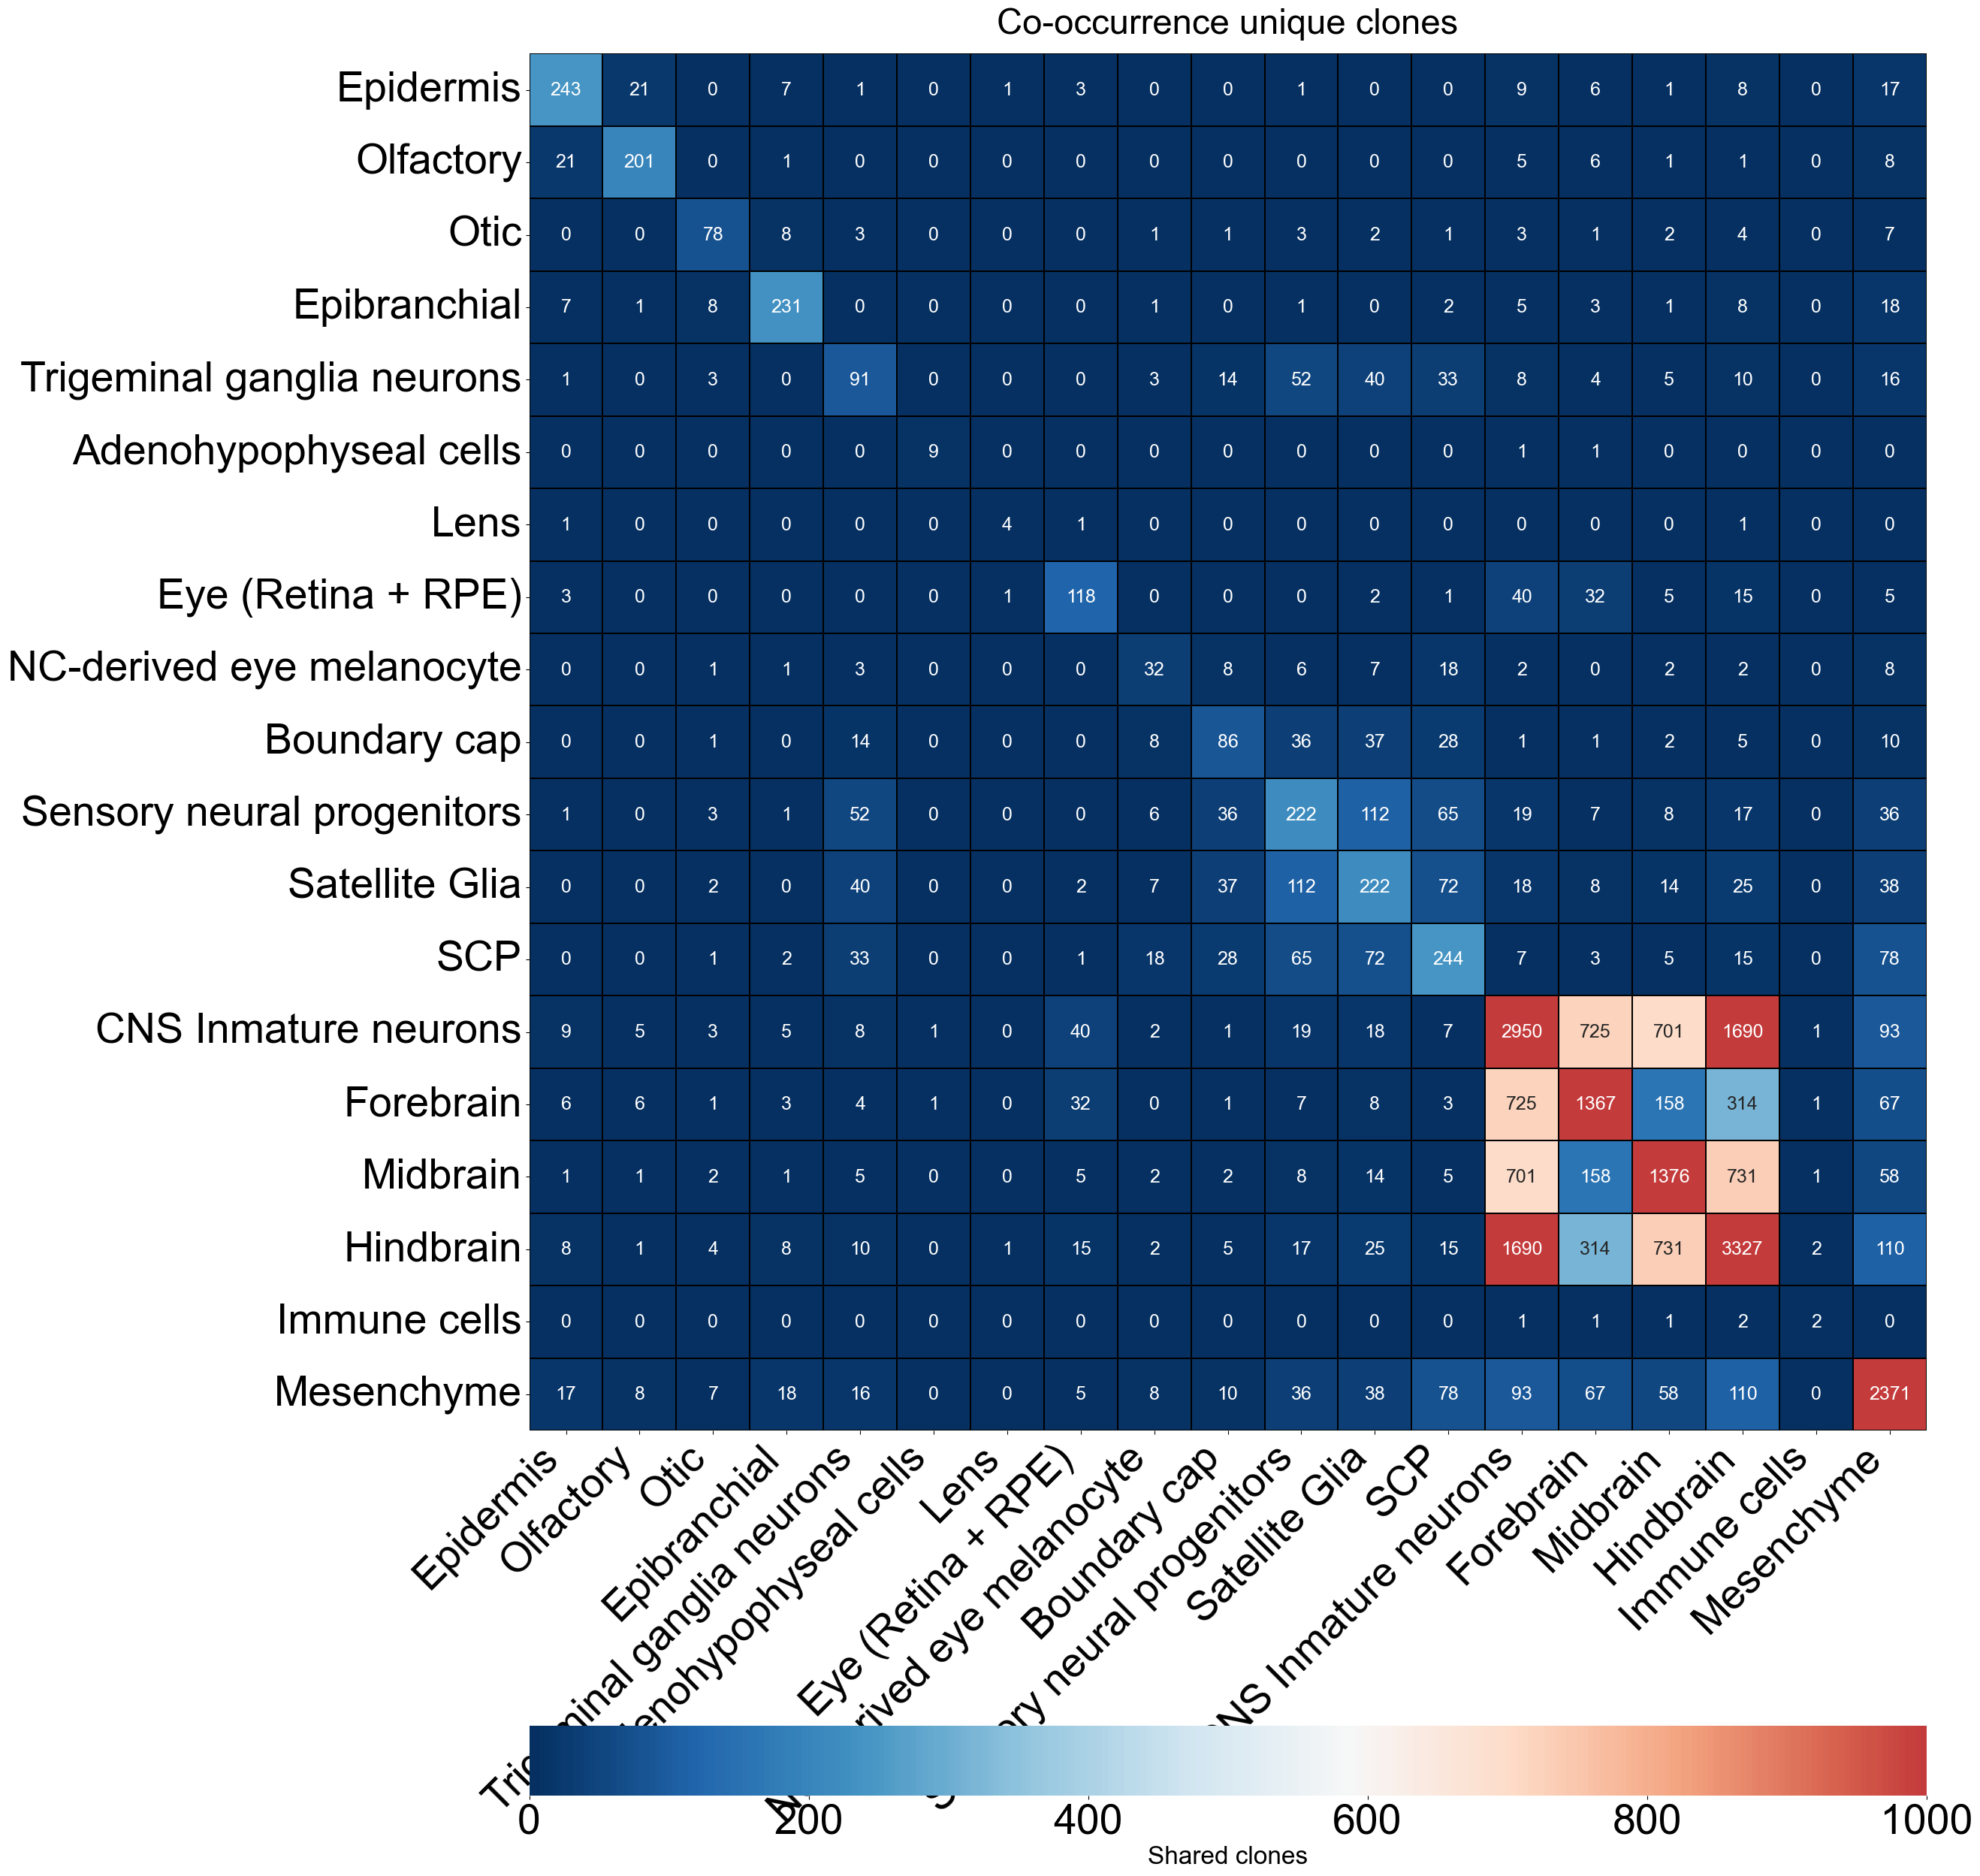

In [42]:
# Increase default font sizes
plt.rcParams.update({
        'font.size': 18,
        'axes.labelsize': 20,
        'axes.titlesize': 20,
        'xtick.labelsize': 40, 
        'ytick.labelsize': 40
    })

from matplotlib.colors import LinearSegmentedColormap
colors_ylord = plt.get_cmap('RdBu_r')(np.linspace(0, 0.85, 256))  
cmap1 = LinearSegmentedColormap.from_list('custom_ylord', colors_ylord)
cmap1.set_under('none')


fig, axes = plt.subplots(figsize=(24,34))

sns.heatmap(co_occurrence,
            cmap=cmap1,
            center=500,
            linewidths=0.01,
            linecolor='black',
            annot=True,
            fmt='.0f',
            ax=axes,
            vmax=1000,
            cbar_kws={'orientation': 'horizontal',
                      'location': 'bottom',
                      'shrink':1,
                      'pad':0.15
                  }
           )



# Customize the plot
plt.title('Co-occurrence unique clones', pad=20, fontsize=34)


# FORCE ALL LABELS TO SHOW AND CENTER THEM ON CELLS
# Set tick positions to center of each cell (0.5, 1.5, 2.5, etc.)
axes.set_yticks([i + 0.5 for i in range(len(co_occurrence.index))])
axes.set_xticks([i + 0.5 for i in range(len(co_occurrence.columns))])

# Set all labels explicitly
axes.set_yticklabels(co_occurrence.index, rotation=0, ha='right')
axes.set_xticklabels(co_occurrence.columns, rotation=45, ha='right')

# Disable automatic tick locator that hides labels
axes.yaxis.set_major_locator(plt.FixedLocator([i + 0.5 for i in range(len(co_occurrence.index))]))
axes.xaxis.set_major_locator(plt.FixedLocator([i + 0.5 for i in range(len(co_occurrence.columns))]))

cbar = axes.collections[0].colorbar  # Get the colorbar
cbar.set_label('Shared clones', size=24)  # Set label and size

plt.savefig("figures/co_occurrence_unique_clones_intersection_with_numbers.svg", dpi=300, transparent=True)